<a href="https://colab.research.google.com/github/MuraliB123/PageRank/blob/main/Another_copy_of_PCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/groceries - groceries.csv")

In [3]:
print(dataset.columns)

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')


In [4]:
print(dataset.head())

   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN 

In [5]:
transactions = []

In [6]:
no_of_transactions = len(dataset)
print(no_of_transactions)

9835


In [7]:
unique_items = set()

In [8]:
for i in range(len(dataset)):
  row_index = i
  row_size  = dataset.loc[row_index,"Item(s)"]
  row_items = []
  for j in range(row_size):
    key = "Item " + str(j+1)
    item_name = dataset.loc[row_index,key]
    item_name = item_name.replace(" ","_")
    item_name = item_name.replace("/","_or_")
    unique_items.add(item_name)
    row_items.append(item_name)
  transactions.append(row_items)



In [9]:
for i in range(len(transactions)):
  print(transactions[i])

Streaming output truncated to the last 5000 lines.
['pork', 'root_vegetables', 'brown_bread', 'pastry']
['sausage', 'pork', 'whole_milk', 'pastry']
['yogurt', 'canned_beer', 'dishes']
['meat', 'finished_products', 'other_vegetables', 'rolls_or_buns', 'brown_bread', 'soda', 'white_wine']
['tropical_fruit', 'brown_bread', 'specialty_bar']
['hamburger_meat', 'other_vegetables', 'whole_milk', 'cream', 'oil', 'sugar', 'baking_powder', 'canned_beer', 'baby_cosmetics']
['root_vegetables', 'other_vegetables', 'yogurt', 'rolls_or_buns', 'bottled_water', 'chocolate', 'napkins']
['chicken', 'whole_milk', 'whipped_or_sour_cream', 'rolls_or_buns', 'white_bread', 'fruit_or_vegetable_juice', 'popcorn', 'photo_or_film']
['dessert', 'brown_bread']
['coffee']
['pip_fruit', 'condensed_milk', 'sugar', 'coffee', 'bottled_water', 'long_life_bakery_product']
['sausage', 'other_vegetables', 'salt', 'male_cosmetics', 'newspapers']
['sausage', 'other_vegetables', 'whole_milk', 'yogurt', 'soda']
['whole_milk', '

In [10]:
print(len(unique_items))

169


In [11]:
items_to_index = {}
num = 1
for item in unique_items:
  items_to_index[item] = num
  num = num + 1

In [12]:
for i in unique_items:
  print(i,items_to_index[i])

bottled_water 1
canned_beer 2
ham 3
napkins 4
mustard 5
long_life_bakery_product 6
brandy 7
preservation_products 8
pet_care 9
soap 10
liver_loaf 11
curd 12
candy 13
cake_bar 14
chicken 15
cereals 16
turkey 17
frozen_fish 18
liquor 19
salty_snack 20
seasonal_products 21
grapes 22
onions 23
pip_fruit 24
white_bread 25
herbs 26
flower_(seeds) 27
beverages 28
newspapers 29
processed_cheese 30
flour 31
ready_soups 32
UHT-milk 33
instant_coffee 34
spices 35
cocoa_drinks 36
detergent 37
whole_milk 38
male_cosmetics 39
chocolate_marshmallow 40
condensed_milk 41
butter_milk 42
popcorn 43
tea 44
organic_sausage 45
candles 46
kitchen_towels 47
pudding_powder 48
artif._sweetener 49
semi-finished_bread 50
abrasive_cleaner 51
rum 52
bottled_beer 53
softener 54
margarine 55
whisky 56
potted_plants 57
rolls_or_buns 58
female_sanitary_products 59
frozen_meals 60
kitchen_utensil 61
cream_cheese 62
domestic_eggs 63
pasta 64
decalcifier 65
baby_cosmetics 66
Instant_food_products 67
house_keeping_products

In [13]:
num_transactions = []
for row in transactions:
  row_list = []
  for item in row:
    item = item.replace(" ","_")
    item = item.replace("/","_or_")
    item_index = items_to_index[item]
    row_list.append(item_index)
  num_transactions.append(row_list)


In [14]:
for row in num_transactions:
  print(row)

Streaming output truncated to the last 5000 lines.
[133, 105, 124, 101]
[131, 133, 38, 101]
[156, 2, 122]
[162, 80, 79, 58, 124, 75, 136]
[144, 124, 69]
[155, 79, 38, 150, 125, 151, 116, 2, 66]
[105, 79, 156, 58, 1, 77, 4]
[15, 38, 97, 58, 25, 140, 43, 168]
[98, 124]
[163]
[24, 41, 151, 163, 1, 6]
[131, 79, 100, 39, 29]
[131, 79, 38, 156, 75]
[38, 42, 156, 58, 25, 5, 110, 120, 142, 75, 123, 6, 107, 109]
[96, 123]
[1]
[101]
[131, 58, 29, 109]
[131, 152, 53]
[38, 58, 104]
[11, 38, 156, 41, 108, 25]
[1]
[115]
[9, 53]
[162, 96, 24, 105, 1]
[87]
[53]
[38, 30, 149, 58]
[60, 25, 140]
[98, 156, 112, 4]
[22, 79, 75, 2]
[58, 151, 163, 75]
[131, 162, 24, 79, 20, 4]
[131, 28, 58]
[159, 4]
[15, 140, 6]
[38, 1, 52, 113]
[58]
[58, 75, 126]
[96, 72, 156, 1, 75, 140, 77, 69, 109]
[58, 101, 163]
[64, 93]
[131, 133, 70, 160, 25, 75, 113]
[144, 24, 22, 121, 163]
[113, 77, 107]
[96, 144, 116, 140, 113, 69, 46, 27]
[64, 107, 122]
[50, 53, 19]
[115, 149, 63, 112, 136, 109]
[38]
[13]
[1]
[38, 25, 9, 1, 54]
[5

In [15]:
#step 1 k=1
items_count = {}
for row in num_transactions:
  for item in row:
    if item in items_count:
      items_count[item] = items_count[item] + 1
    else:
      items_count[item] = 1

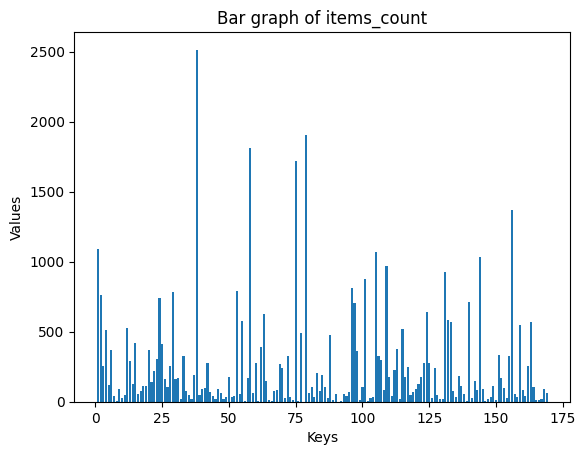

In [16]:
import matplotlib.pyplot as plt
keys = list(items_count.keys())
values = list(items_count.values())
plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar graph of items_count')
plt.show()

In [ ]:
for i in range(0,len(items_count),1):
  print(i+1,items_count[i+1])

1 42
2 32
3 41
4 414
5 571
6 28
7 106
8 23
9 6
10 276
11 189
12 22
13 13
14 473
15 91
16 924
17 55
18 241
19 148
20 84
21 174
22 57
23 1715
24 294
25 9
26 67
27 7
28 140
29 576
30 27
31 59
32 187
33 256
34 16
35 106
36 8
37 516
38 80
39 73
40 1
41 1072
42 638
43 207
44 32
45 44
46 118
47 2
48 8
49 19
50 6
51 275
52 545
53 174
54 764
55 744
56 30
57 50
58 15
59 792
60 1
61 130
62 422
63 12
64 1903
65 168
66 580
67 78
68 515
69 324
70 41
71 567
72 112
73 365
74 110
75 15
76 279
77 101
78 333
79 38
80 241
81 390
82 89
83 176
84 90
85 109
86 29
87 79
88 4
89 88
90 269
91 50
92 279
93 103
94 170
95 82
96 10
97 26
98 25
99 42
100 160
101 1087
102 327
103 64
104 51
105 64
106 56
107 115
108 27
109 2513
110 89
111 33
112 488
113 45
114 329
115 8
116 22
117 11
118 75
119 68
120 1372
121 969
122 4
123 18
124 102
125 246
126 36
127 229
128 20
129 163
130 23
131 32
132 35
133 220
134 31
135 875
136 101
137 814
138 189
139 372
140 50
141 305
142 173
143 378
144 254
145 256
146 705
147 148
148 35
14

In [17]:
#let the support thresold = 100 (optimize later)
for i in range(0,len(items_count)):
  key = i + 1
  count = items_count[key]
  if count < 100:
    del items_count[key]
  else:
    continue

In [18]:
print(len(items_count))

88


In [ ]:
# make pairs, k = 2
hash_func = [0]*37                 # hash_buckets
candidate_sets = {

}                                  # to store pairs that belongs to each bucket.
for row in num_transactions:
  basket = row
  for i in range(0,len(basket)-1,1):
    for j in range(i+1,len(basket),1):
      item_pair = [basket[i],basket[j]]
      if (basket[i] in items_count) and (basket[j] in items_count):

         hash_index = (basket[i]*basket[j])%37

         if hash_index in candidate_sets:
          temp = candidate_sets[hash_index]
          if item_pair not in temp:
            candidate_sets[hash_index].append(item_pair)
         else:
          candidate_sets[hash_index] = [item_pair]

         hash_func[hash_index] = hash_func[hash_index] + 1

      else:
        continue


In [ ]:
#view hash_tables
for i in hash_func:
  print(i)

3854
3475
2847
2716
3098
3689
2921
2757
3363
2929
2532
3023
2887
3093
2818
2836
3406
2751
2857
3181
4379
3168
3163
2916
3467
2898
3050
3579
2554
3875
3104
2573
2608
2780
3430
3440
3019


In [ ]:
bit_vec = [0]*37
for i in range(len(hash_func)):
  if hash_func[i] >= 3500:
    bit_vec[i] = 1

In [ ]:
print(bit_vec)

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
final_sets = [

]

In [ ]:
for i in range(len(bit_vec)):
  if bit_vec[i] == 1:
    for item_set in candidate_sets[i]:
      final_sets.append(item_set)

In [ ]:
print(final_sets)

[[37, 133], [37, 138], [51, 74], [120, 74], [81, 74], [74, 153], [74, 101], [74, 23], [74, 163], [145, 37], [37, 146], [37, 125], [37, 153], [37, 127], [16, 37], [37, 109], [37, 137], [37, 102], [37, 41], [37, 42], [37, 100], [37, 166], [37, 72], [66, 74], [165, 74], [109, 74], [74, 29], [74, 121], [37, 73], [37, 74], [102, 74], [41, 74], [73, 74], [74, 42], [71, 37], [37, 55], [37, 29], [37, 64], [37, 51], [37, 33], [37, 18], [37, 93], [37, 80], [37, 124], [66, 37], [37, 160], [37, 52], [37, 7], [37, 101], [37, 59], [37, 14], [37, 142], [37, 120], [37, 155], [37, 65], [37, 46], [37, 83], [37, 54], [37, 69], [37, 68], [37, 4], [37, 135], [37, 147], [37, 167], [37, 10], [37, 5], [37, 163], [37, 165], [37, 141], [37, 23], [37, 121], [37, 78], [37, 92], [74, 7], [74, 4], [74, 92], [74, 158], [74, 59], [37, 168], [37, 107], [37, 112], [137, 74], [37, 90], [144, 37], [37, 114], [37, 21], [37, 94], [37, 129], [37, 158], [37, 77], [37, 139], [37, 150], [62, 37], [37, 76], [64, 74], [74, 5], [

In [ ]:
def support1(item_pair):
  no_of_transac_x_and_y = 0
  for row in num_transactions:
    hash = {
        item_pair[0]:0,
        item_pair[1]:0
    }
    for item in row:
      if item in hash:
        hash[item] = hash[item]+1

    if hash[item_pair[0]] >= 1 and hash[item_pair[1]] >= 1:
      no_of_transac_x_and_y = no_of_transac_x_and_y + 1

  return no_of_transac_x_and_y/len(num_transactions)

def support2(input_item):
  no_of_transac = 0
  for row in num_transactions:
    is_present = False
    for item in row:
      if item == input_item:
        is_present = True

    if is_present == True:
      no_of_transac = no_of_transac + 1
  return no_of_transac/len(num_transactions)



In [ ]:
for item_set in final_sets:
  conf1 = (support1(item_set)/support2(item_set[0]))*100
  conf2 = (support1(item_set)/support2(item_set[1]))*100
  if conf1 >= 30:
    print(item_set[0],"->",item_set[1],conf1)
  if conf2 >= 30:
    print(item_set[1],"->",item_set[0],conf2)

74 -> 120 31.818181818181817
74 -> 153 37.27272727272727
37 -> 109 40.50387596899225
37 -> 41 33.13953488372093
37 -> 64 37.596899224806194
166 -> 64 36.25730994152047
18 -> 64 38.589211618257266
16 -> 109 31.818181818181817
55 -> 64 34.54301075268817
53 -> 109 52.29885057471264
127 -> 109 37.99126637554585
129 -> 64 33.128834355828225
64 -> 109 38.67577509196006
101 -> 109 31.094756209751605
146 -> 64 40.283687943262414
138 -> 109 46.56084656084656
85 -> 59 42.20183486238532
35 -> 64 33.9622641509434
42 -> 109 38.87147335423197
5 -> 109 32.22416812609457
153 -> 109 30.790491984521832
41 -> 109 44.86940298507462
78 -> 109 44.44444444444445
152 -> 109 35.84905660377359
65 -> 153 31.54761904761904
4 -> 109 40.57971014492754
